# Explore here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


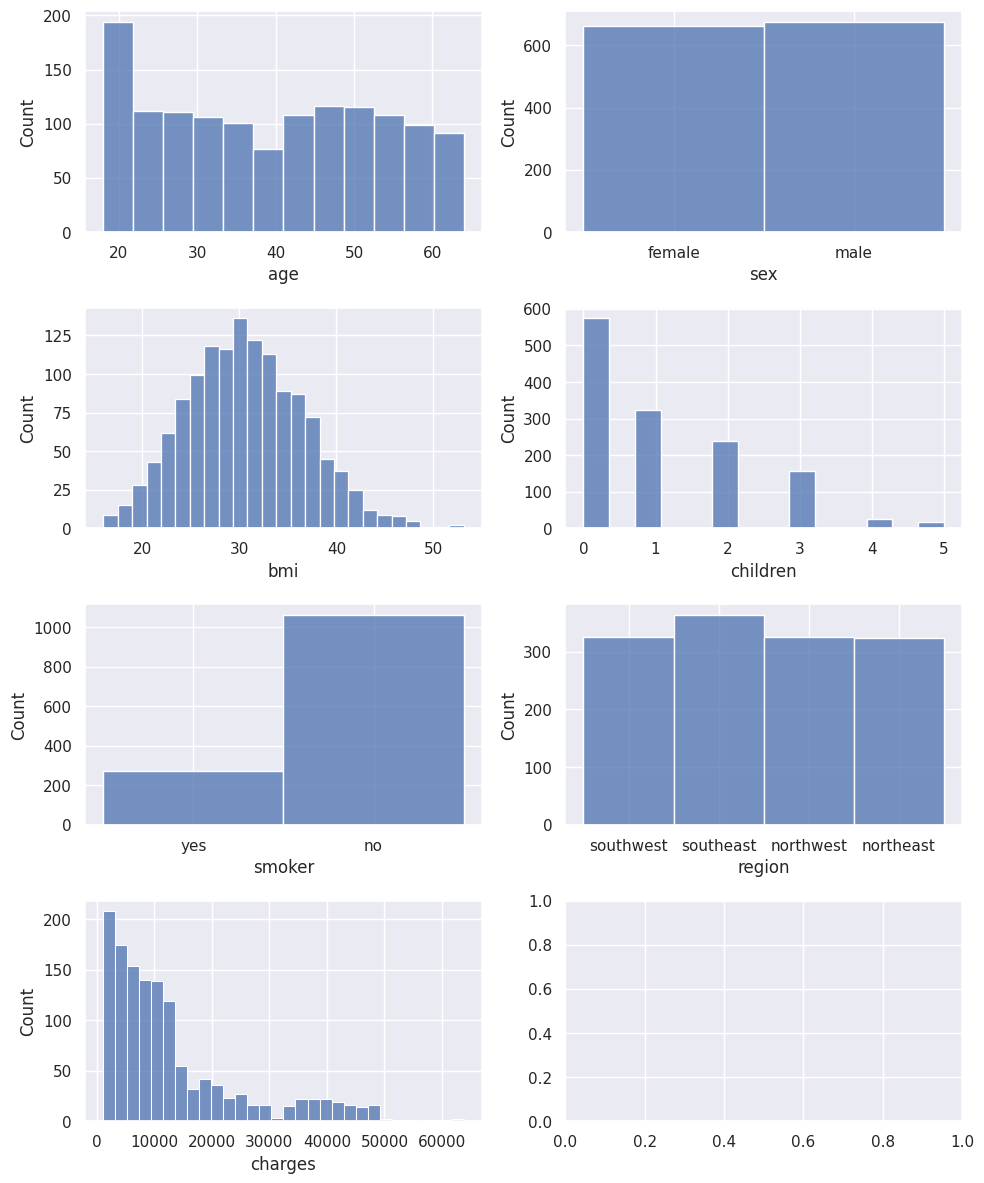

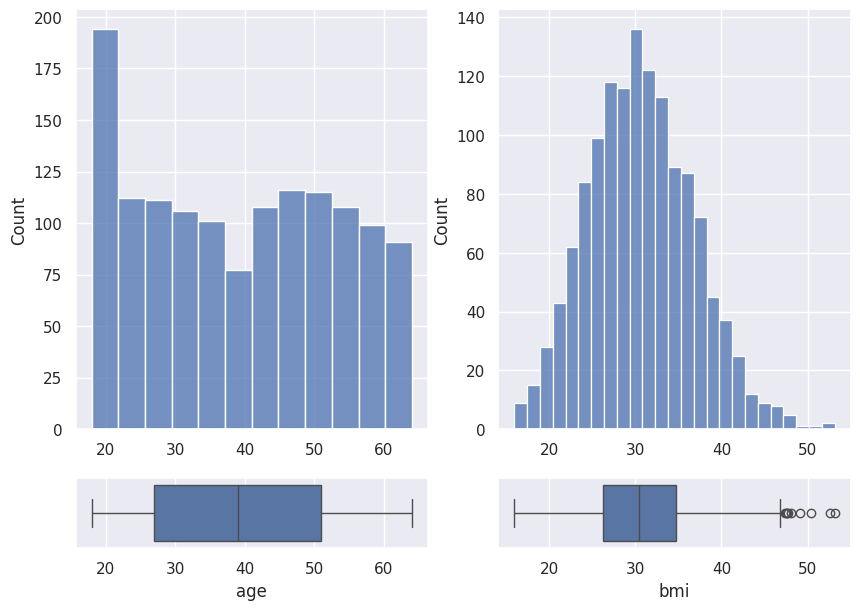

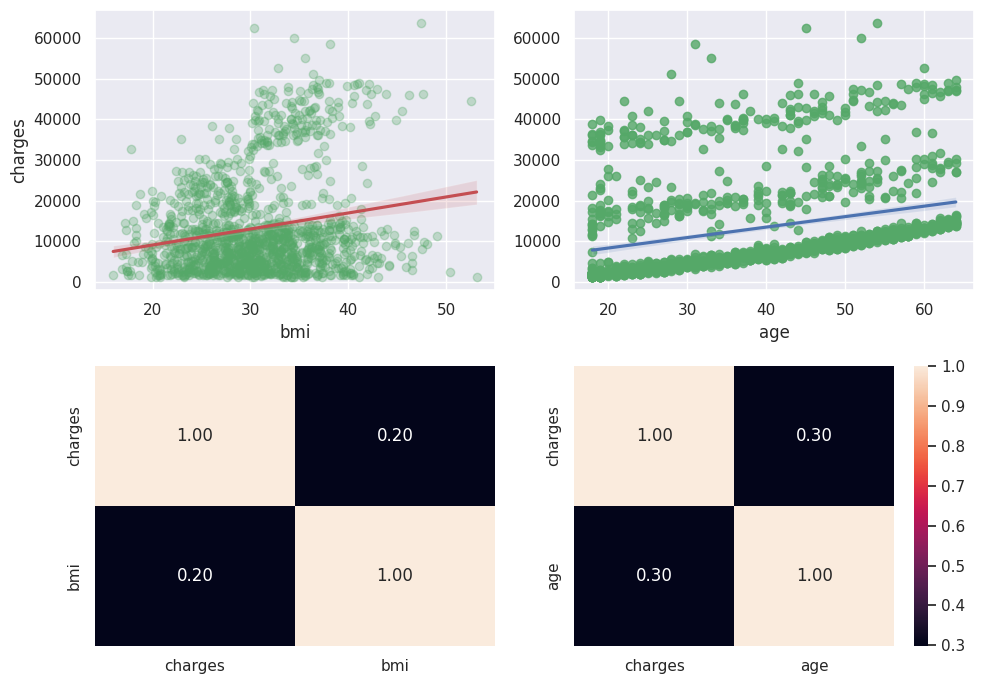

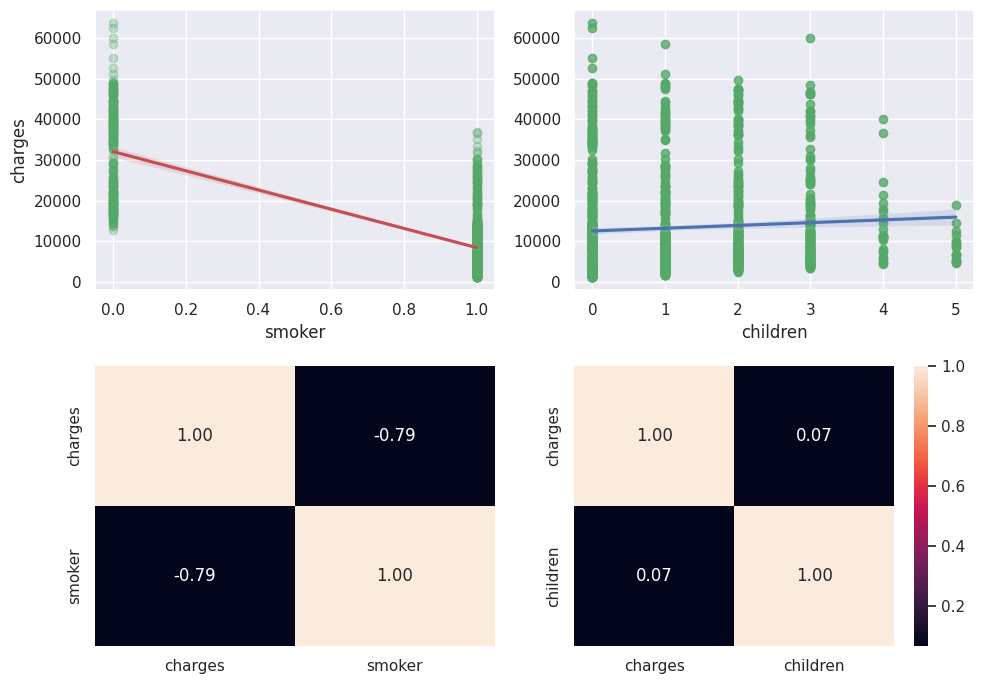

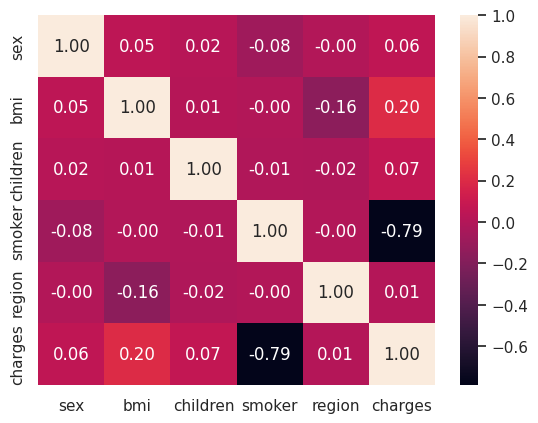

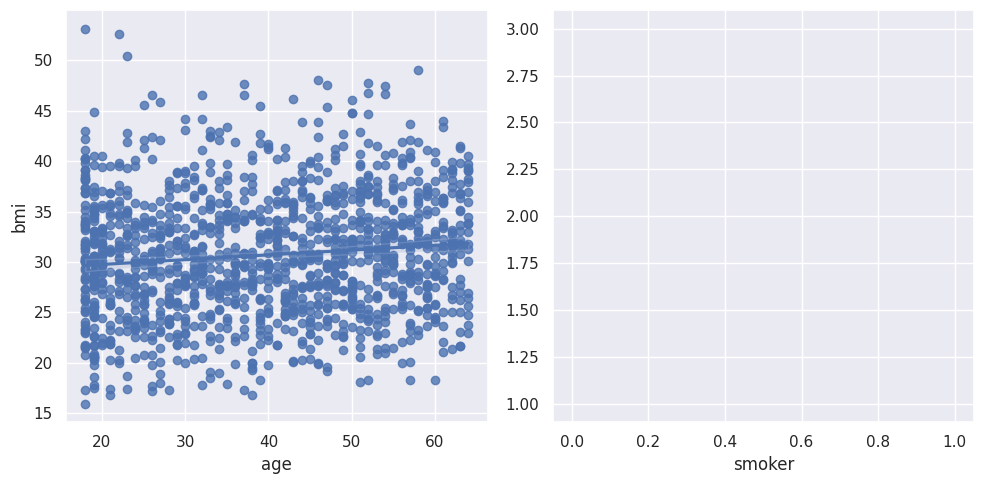

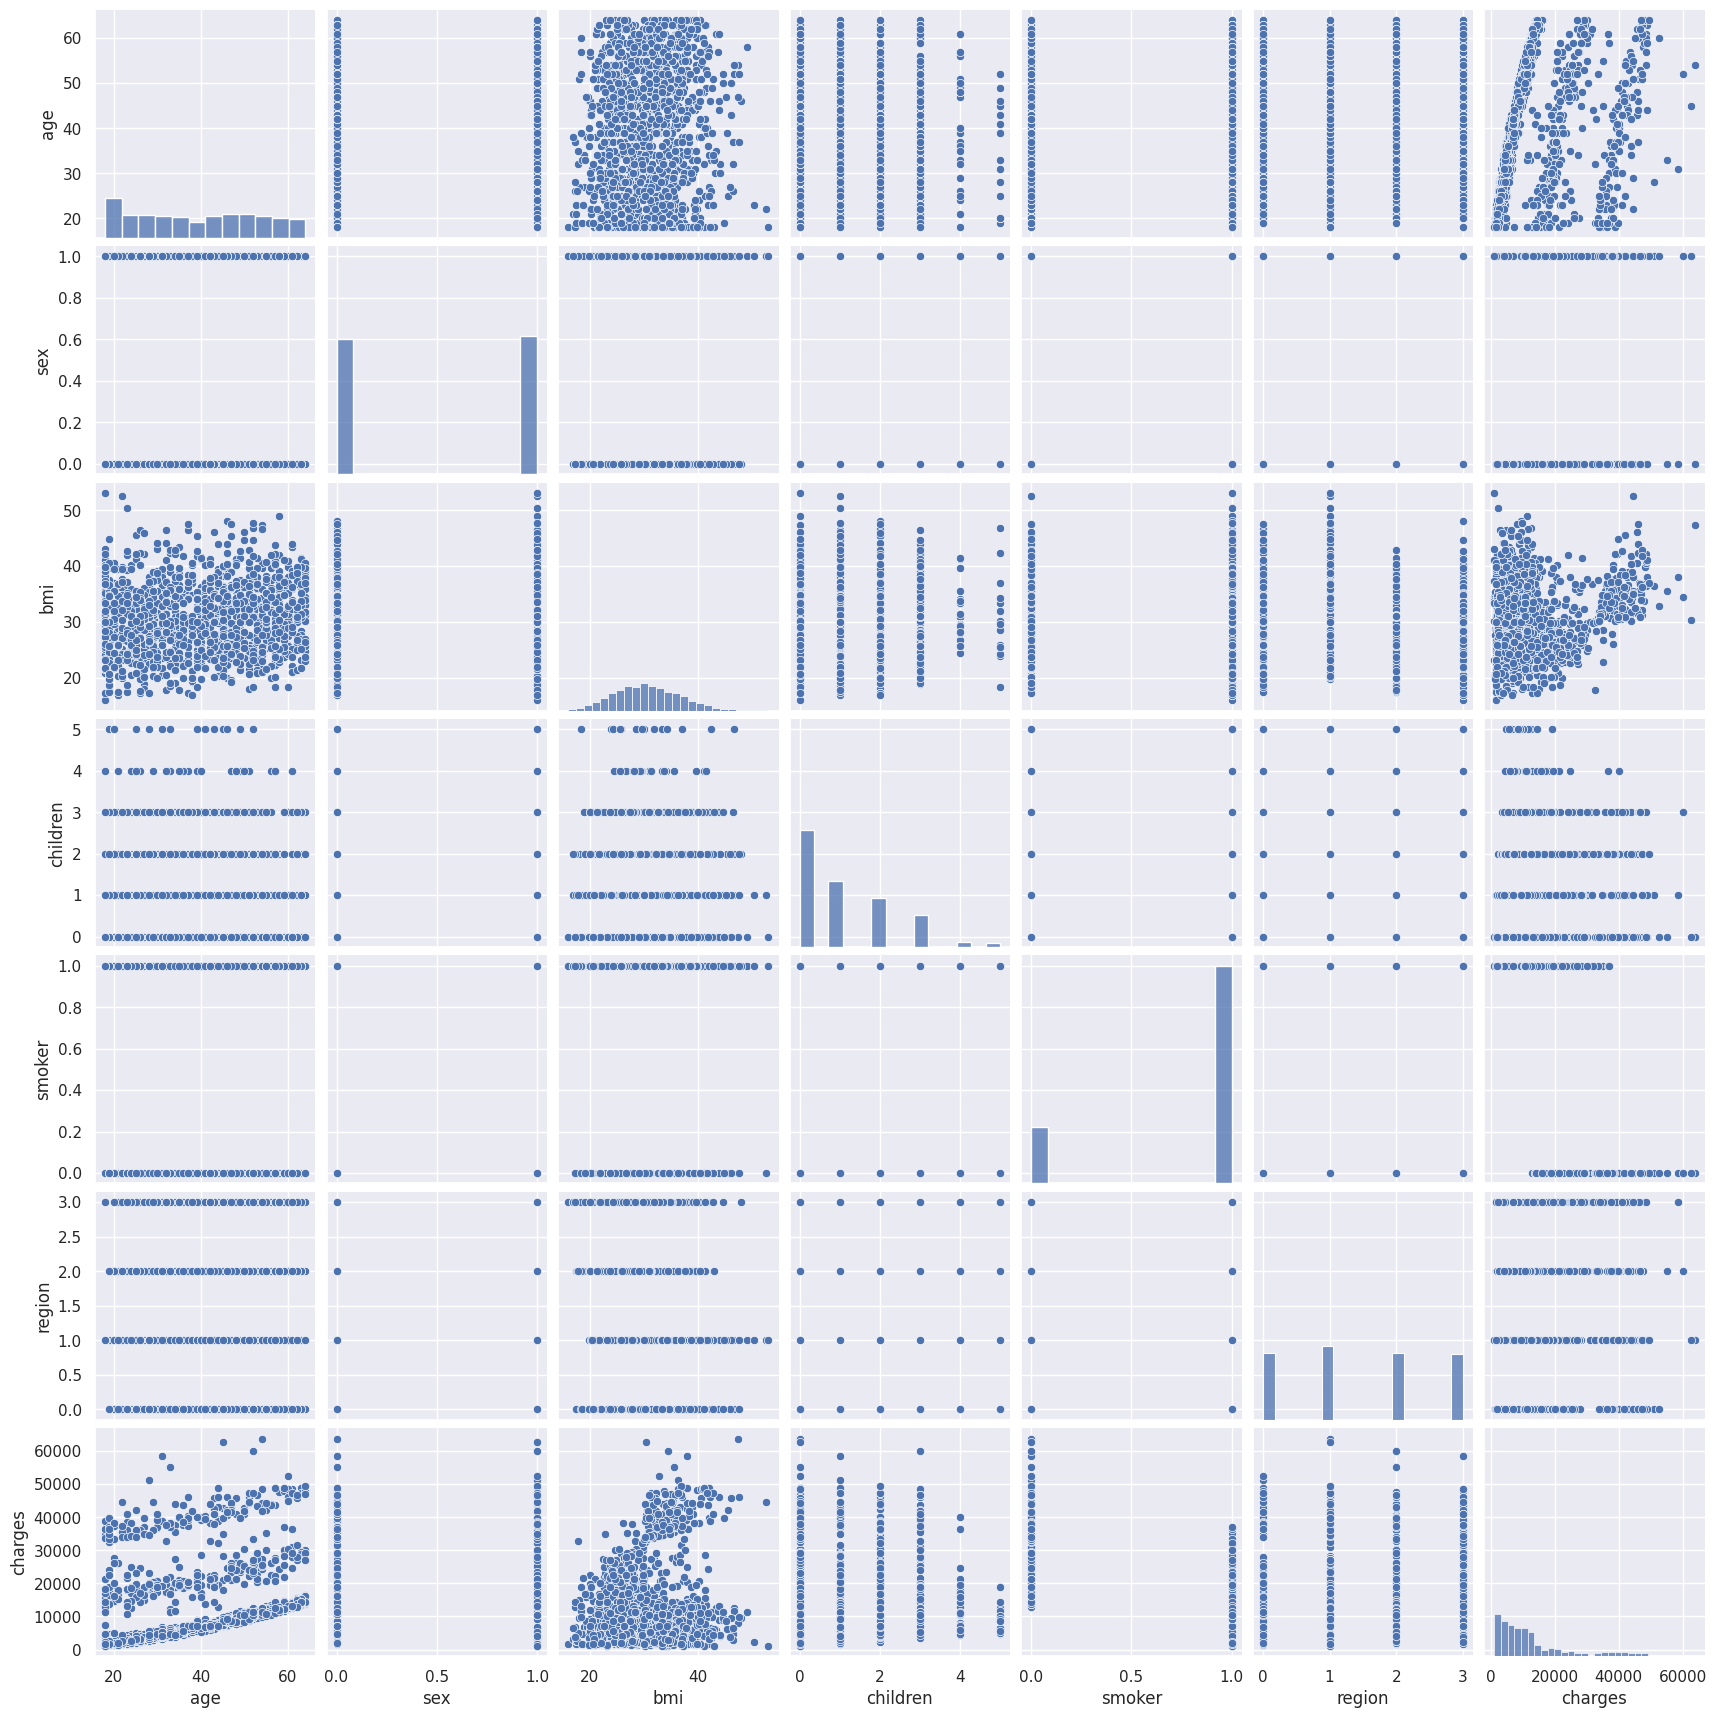

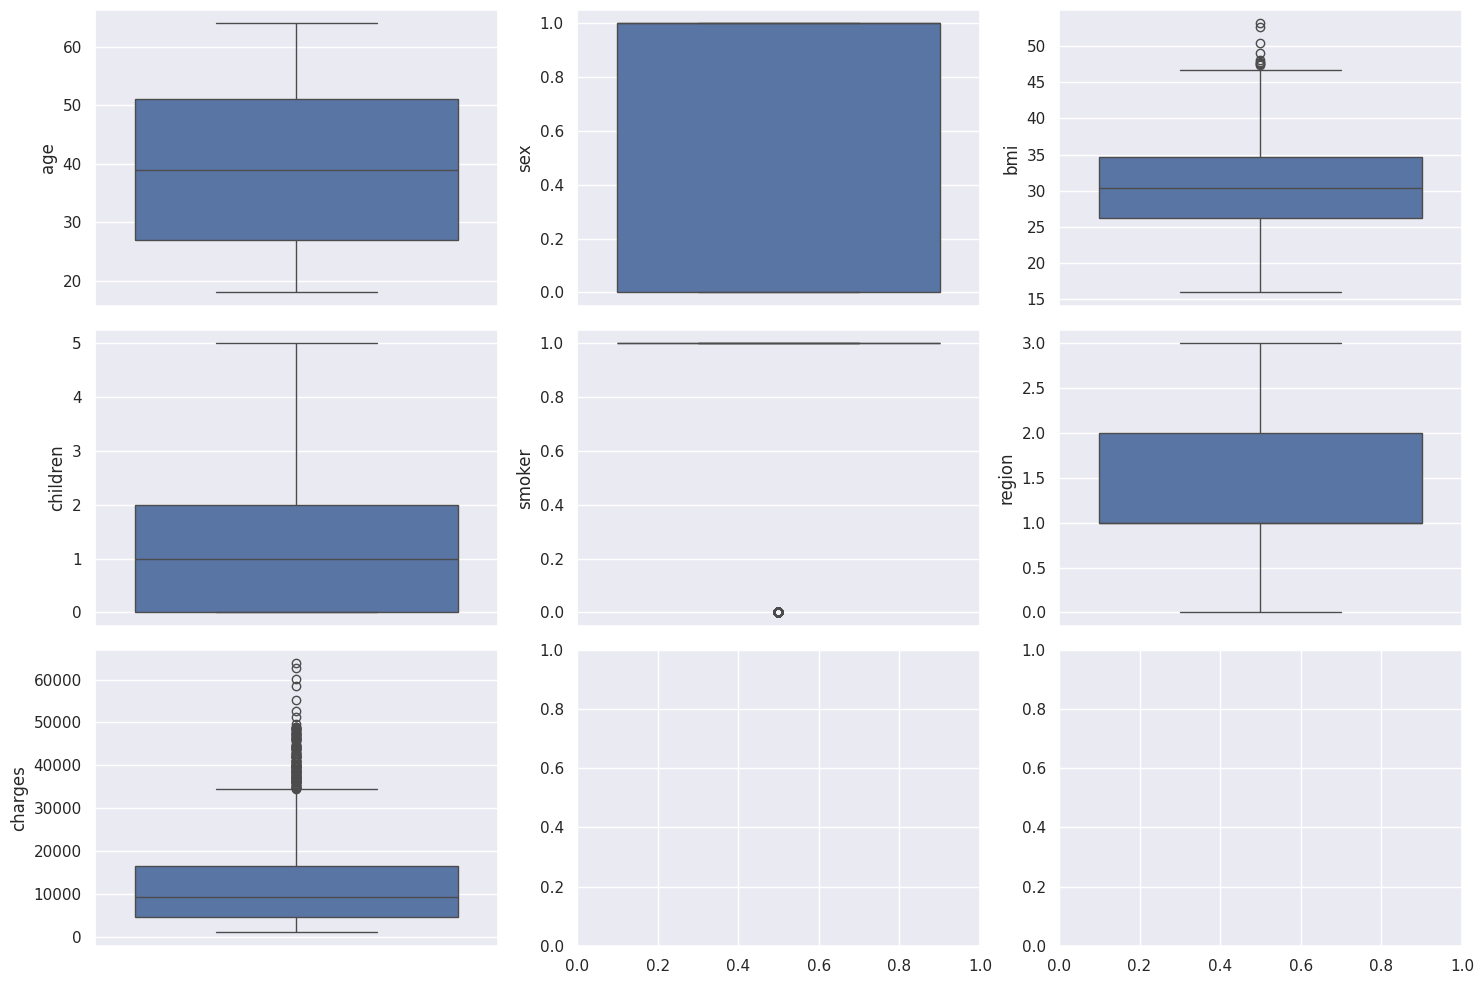

Intercepto (a): 0.31527575461646196
Coeficientes (b): [ 1.88744789e-01 -2.99950365e-04  1.99222443e-01  3.39266773e-02
 -3.77467899e-01  1.29907675e-02]
Error cuadrático medio: 0.00856982679944619
Coeficiente de determinación: 0.7833463107364538


In [20]:
# Your code here

# proyecto de uso de la regresion lineal para estimar la relación entre dos variables cuantitativas. ejemplos: 

#Qué tan fuerte es la relación entre dos variables (la relación entre lluvia y erosión del suelo).
#El valor de la variable dependiente a un cierto valor de la variable independiente (la cantidad de erosión del suelo a un cierto nivel de lluvia).

import pandas as pd

# creamos el csv:

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

dataframe.head()

# dimensiones del data frame:

dataframe.shape

# info del data frame y valores no nulos:

dataframe.info()

# comprobamos si hay duplicados:

duplicates = dataframe.duplicated()

duplicates.sum()

# 1 Análisis Univariante: preparamos el entorno para visualizar graficos.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')
%matplotlib inline

fig, axis = plt.subplots(4,2, figsize = (10,12))

sns.histplot(ax = axis[0,0], data = dataframe, x = 'age')
sns.histplot(ax = axis[0,1], data = dataframe, x = 'sex')
sns.histplot(ax = axis[1,0], data = dataframe, x = 'bmi')
sns.histplot(ax = axis[1,1], data = dataframe, x = 'children')
sns.histplot(ax = axis[2,0], data = dataframe, x = 'smoker')
sns.histplot(ax = axis[2,1], data = dataframe, x = 'region')
sns.histplot(ax = axis[3,0], data = dataframe, x = 'charges')


plt.tight_layout()

plt.show()

# reliazo anlaisis entre las variables bmi y age:

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = dataframe, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = dataframe, x = "age")
sns.histplot(ax = axis[0, 1], data = dataframe, x = "bmi").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = dataframe, x = "bmi")

# la visualizacion es normal pero vemos algo en los outliers.

#Análisis de datos multivariante:

# veo que necesito convertir sex y smoker en variables numéricas:

dataframe['smoker'] = pd.factorize(dataframe['smoker'])[0]
dataframe['sex'] = pd.factorize(dataframe['sex'])[0]

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creo un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataframe, x = "bmi", y = "charges", scatter_kws= {'color': 'g', 'alpha': 0.3}, line_kws = {'color': 'r'})
sns.heatmap(dataframe[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataframe, x = "age", y = "charges", scatter_kws= {'color': 'g'}).set(ylabel=None)
sns.heatmap(dataframe[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustamos:
plt.tight_layout()

# Muestro el plot:
plt.show()

# A mayor edad del usuario mayor coste del seguro

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creamos un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataframe, x = "smoker", y = "charges", scatter_kws= {'color': 'g', 'alpha': 0.3}, line_kws = {'color': 'r'})
sns.heatmap(dataframe[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataframe, x = "children", y = "charges", scatter_kws= {'color': 'g'}).set(ylabel=None)
sns.heatmap(dataframe[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustamos:
plt.tight_layout()

# Muestro el plot:
plt.show()

# el hecho del que el usuario sea fumador si entra en relacion con el coste del seguro. el numero de hijos no es relativo ni indexado al coste.

# convierto a valor numérico la variable región con la función factorize:

dataframe['region'] = pd.factorize(dataframe['region'])[0]

# creo un mapa de calor "hetmap":

sns.heatmap(dataframe[['sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(), annot = True, fmt = '.2f')

# Ajustamos:

plt.tight_layout

# Muestro el heatmap:

plt.show()

# Volvemos a ver que el sewr fumador es importante para el coste del seguro:

# creo 2 graficos de regresion para mostrar la relacion entre la edad y el indice de masa corporal y otro para mostrar la relación entre fumar y el indice de masa corporal:


fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = dataframe, x = "age", y = "bmi")
sns.regplot(ax = axis[1], data = dataframe, x = "smoker", y = "bmi").set(ylabel = None, ylim = (0.9, 3.1))

# Ajustamos:

plt.tight_layout()

# Muestro el plot:

plt.show()

# Matriz de Gráficos para ver las relaciones entre todas las variables numéricas del data frame:

sns.pairplot(data = dataframe)

# Ingenieria de características:
# resumen estadistico de las variables del DF:

dataframe.describe()

# creo una matriz de graficos de caja "boxplots" para ver la distribución y los posibles valores atípicos de varias variables de DF:

fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dataframe, y = "age")
sns.boxplot(ax = axis[0, 1], data = dataframe, y = "sex")
sns.boxplot(ax = axis[0, 2], data = dataframe, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = dataframe, y = "children")
sns.boxplot(ax = axis[1, 1], data = dataframe, y = "smoker")
sns.boxplot(ax = axis[1, 2], data = dataframe, y = "region")
sns.boxplot(ax = axis[2, 0], data = dataframe, y = "charges")

# Ajusto:
plt.tight_layout()


# Muestro:
plt.show()

# La variable Charges es la más afectada.

# busco los valores nulos que me puedan estar arrojando ruido:

dataframe.isnull().sum().sort_values(ascending=False)


# Escalado de Valores:

# 1 Normalización:

from sklearn.preprocessing import StandardScaler

num_variables = ['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']

scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
total_data_norm.head()

# Escalado de min-max para normalizar y que los datos se fijen entre 0 y 1:

from sklearn.preprocessing import MinMaxScaler

num_variables = ['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
total_data_scal.head()

# Selección de caract:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

# Divido en training y test:
# Crea una matriz "X" que contiene todas las características (columnas) del conjunto de datos,menos la columna de "Charges" que la elimino.
X = total_data_scal.drop('charges', axis = 1)

# Creo una serie "y" que contiene los valores de la columna "charges", que es la variable mas resaltante.

y = total_data_scal['charges']

# Divide los datos en conjuntos de entrenamiento y prueba,
#  80% se usa para entrenar el modelo (X_train y y_train) y el 20% se usa para probar su rendimiento (X_test y y_test).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

# El método SelectKBest:
# basándose en un criterio específico: f_regression.(técnica estadística que se utiliza  para evaluar la relación lineal) entre variables dependiente e independientes.

selection_model = SelectKBest(f_regression, k = 6)

# Ajuste del modelo usando los datos de entrenamiento:

selection_model.fit(X_train, y_train)

# Vector Boolenao delas caracteristicas enmarcadas en false y true:

ix = selection_model.get_support()

# Transformacion del conjunto usando las caract, selecionnadas y cvrea el nuevo df de X_train con esas mismas caract:

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

# Transformacion del conjunto usando las caract, selecionnadas y cvrea el nuevo df de X_tets_sel con esas mismas caract:

X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

# Muestro la cabecera del Df:

X_train_sel.head()


# Regresión Lineal:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

# el Conceptp "model.intercept" nos muestra donde comienza la linea de la regresión en el eje "y".

print(f"Intercepto (a): {model.intercept_}")

# el concepto "model.coef_ arroja info de las variables independientes y de su indexado en el resultado"

print(f"Coeficientes (b): {model.coef_}")

y_pred = model.predict(X_test)
y_pred

# Error cuadratico, para ver y medir las desviaciones del modelo:

from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

# Coeficiente de determinación R-cuadrado ( un valor alto nos demuestra confianza frente a un valor bajo que denota necesida de mejora)

print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")




